In [749]:
#Import all the dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import glob
from wordcloud import WordCloud,STOPWORDS
import PyPDF2
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import bs4 as bs
import urllib.request
import re
import nltk
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import gensim
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, join
import array
from gensim.models import doc2vec
from collections import namedtuple
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [1145]:
#read the dataset which contains the documents and their abstracts extracted from Scopus
data = pd.read_csv('Documents\slrwebsite\mysite\scopus.csv',encoding='latin-1')
data = data
string_to_search = "©"

ParserError: Error tokenizing data. C error: Expected 14 fields in line 5, saw 28


In [1146]:
#remove special characters a
data['Abstract_clean'] = data['Abstract'].apply(lambda x:(x.split('©')[0]).lower())

In [1121]:
#save abstracts in a list
abs_list = data.Abstract_clean.tolist()
abs_list[2]

"every year, the bibliography catalogues the most important new publications, historiographical monographs, and journal articles throughout the world, extending from prehistory and ancient history to the most recent contemporary historical studies. within the systematic classification according to epoch, region, and historical discipline, works are also listed according to author's name and characteristic keywords in their title. "

In [1122]:
len(abs_list)

74

In [1123]:

# Load data for doc2vec 

doc1 = abs_list

# Transform data (you can add more data preprocessing steps here)
# the text in each abstract is set to lower case, split into a set of words and the words are appended to a list

docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(doc1):
    words = text.lower().split()
    tags = [i]
    docs.append(analyzedDocument(words, tags))

# Train model (set window to lower value if more specific semantics are needed)

model = doc2vec.Doc2Vec(docs,  window = 300, min_count = 2, workers = 4)

# Get the vectors

print(model.dv[0])

[-0.08695915  0.12293535  0.00197149  0.08234884 -0.02305581 -0.04172605
  0.03608727  0.09364484 -0.05783866 -0.02894329  0.02811853 -0.04228374
  0.02455875  0.0105561  -0.01910892 -0.05357573 -0.015012   -0.08875977
 -0.06849038 -0.08567317  0.02006661  0.02185017 -0.00930188  0.00468722
  0.02919622  0.00728846  0.00283871 -0.00228454 -0.05264529  0.03123018
  0.07582149 -0.0487781   0.00259253 -0.08753673 -0.04791457  0.01590913
  0.03642462 -0.03233854 -0.00491878 -0.0397493  -0.02944332 -0.03427797
 -0.03914632  0.00868106  0.02677723 -0.07889462  0.01025241 -0.0313231
  0.0236293  -0.02431064  0.02359162 -0.01631595 -0.1259364  -0.01155953
  0.02077973  0.04131453  0.04530101 -0.01785753 -0.03035728  0.02260999
  0.01793597  0.05921099  0.01933531 -0.00948611 -0.07730225  0.03615691
  0.00955394  0.07790717 -0.08827366  0.0519146   0.01259061 -0.02033242
  0.00235964 -0.03019072  0.02530287  0.03136096 -0.00316539 -0.00395999
 -0.08029621  0.03282652 -0.02447828  0.02931856 -0.

In [1124]:
# Extract words and vectors
words = model.dv.index_to_key
vectors = [model[word].tolist() for word in words]

# Combine words and vectors into a list of lists
vector_list = list(vectors)

# Display the result or further processing
print(vector_list[0])

[-2.1070940494537354, 3.3943886756896973, 0.3170243501663208, 1.9042643308639526, -0.6595962047576904, -1.1816827058792114, 1.06581449508667, 2.5484542846679688, -1.1773505210876465, -0.8094355463981628, 0.6097931265830994, -1.219942569732666, 0.7857058048248291, 0.341988205909729, -0.31504976749420166, -1.2134969234466553, -0.38314932584762573, -2.5462939739227295, -1.4517643451690674, -2.134359836578369, 0.6518362760543823, 0.49249395728111267, 0.1147134080529213, 0.1053190603852272, 0.47961896657943726, 0.4520648717880249, 0.2482287585735321, 0.19090154767036438, -1.5095372200012207, 1.0531868934631348, 1.8507802486419678, -1.387121558189392, 0.22960026562213898, -2.056948184967041, -1.174479365348816, 0.3392215371131897, 1.0313563346862793, -0.526839554309845, -0.05918242409825325, -1.0891594886779785, -0.7483707070350647, -0.6291900277137756, -1.240176796913147, 0.40341854095458984, 0.6040809750556946, -1.7972527742385864, 0.2958795130252838, -0.6782687902450562, 0.494752287864685

In [1125]:
# Assuming df is your DataFrame and array_list is your list of arrays
# convert the list of vectors into a dataframe
df = pd.DataFrame(index=range(1, len(vector_list)+1), columns=[])  

array_list = vector_list

# Combine the DataFrame and the list of arrays
result_df = pd.concat([df, pd.DataFrame(array_list, index=df.index)], axis=1)

# Display the result
print(result_df)

          0         1         2         3         4         5         6   \
1  -2.107094  3.394389  0.317024  1.904264 -0.659596 -1.181683  1.065814   
2  -2.335432  3.674577  0.375898  2.132842 -0.713126 -1.233506  1.150060   
3  -2.692601  4.202719  0.436307  2.500694 -0.842708 -1.296202  1.435198   
4  -1.994528  3.119512  0.359440  1.764050 -0.528113 -1.085479  0.828306   
5  -1.687170  2.622250  0.260083  1.533207 -0.515118 -0.834522  0.817042   
..       ...       ...       ...       ...       ...       ...       ...   
70 -0.944183  1.492681  0.150976  0.892303 -0.338125 -0.501602  0.590946   
71 -0.838698  1.311932  0.150242  0.769470 -0.218037 -0.435157  0.352779   
72 -0.677451  1.083011  0.125061  0.621198 -0.182819 -0.323471  0.295652   
73 -0.806374  1.302851  0.102664  0.722702 -0.255012 -0.440119  0.474185   
74 -0.421640  0.756563  0.019987  0.361181 -0.159356 -0.337541  0.275892   

          7         8         9   ...        90        91        92        93  \
1   2.

In [1126]:
#set the index ID to identify which vector is for which document ID
result_df['ID'] = df.reset_index().index + 1
cols = list(result_df.columns)
cols = [cols[-1]] + cols[:-1]
result_df = result_df[cols]
result_df

,ID,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
1,1,-2.107094,3.394389,0.317024,1.904264,-0.659596,-1.181683,1.065814,2.548454,-1.177351,...,0.242455,1.175905,0.442061,-1.359885,3.324540,1.269908,1.276004,-1.499433,0.813577,-0.969847
2,2,-2.335432,3.674577,0.375898,2.132842,-0.713126,-1.233506,1.150060,2.690682,-1.386364,...,0.181670,1.308416,0.507509,-1.521139,3.593051,1.326123,1.403086,-1.675751,0.966097,-1.047252
3,3,-2.692601,4.202719,0.436307,2.500694,-0.842708,-1.296202,1.435198,3.119768,-1.707329,...,0.064585,1.542330,0.686563,-1.983959,4.203741,1.545114,1.726783,-2.090465,1.311601,-1.235118
4,4,-1.994528,3.119512,0.359440,1.764050,-0.528113,-1.085479,0.828306,2.235611,-1.057106,...,0.205947,1.018940,0.344634,-1.141462,2.990888,1.149244,1.183374,-1.279358,0.732794,-0.926486
5,5,-1.687170,2.622250,0.260083,1.533207,-0.515118,-0.834522,0.817042,1.902866,-1.023264,...,0.104753,0.944269,0.374029,-1.119323,2.575867,0.932753,1.021007,-1.235506,0.740695,-0.755882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,-0.944183,1.492681,0.150976,0.892303,-0.338125,-0.501602,0.590946,1.170746,-0.597806,...,0.016370,0.556294,0.243208,-0.785044,1.525941,0.610882,0.633168,-0.765719,0.459451,-0.437480
71,71,-0.838698,1.311932,0.150242,0.769470,-0.218037,-0.435157,0.352779,0.927617,-0.493612,...,0.075261,0.439905,0.151528,-0.486187,1.265975,0.470777,0.499203,-0.565682,0.341869,-0.386975
72,72,-0.677451,1.083011,0.125061,0.621198,-0.182819,-0.323471,0.295652,0.777012,-0.388548,...,0.046381,0.346735,0.155574,-0.443844,1.033085,0.369898,0.430260,-0.475440,0.312651,-0.327866
73,73,-0.806374,1.302851,0.102664,0.722702,-0.255012,-0.440119,0.474185,1.022023,-0.443934,...,0.067949,0.460665,0.188714,-0.589952,1.293797,0.508493,0.508521,-0.628332,0.340306,-0.386378


In [1127]:

# Applying PCA 

# Step 1: Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(result_df)

# Step 2: Apply PCA to reduce dimensionality to 5 components
n_components = 5
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_standardized)

# Create a new DataFrame with the reduced dimensionality
columns_pca = [f'PC{i}' for i in range(1, n_components + 1)]
df_pca_result = pd.DataFrame(data=df_pca, columns=columns_pca)

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio from 5 components: {explained_variance_ratio}")
df_pca_result
df_pca_result['ID'] = df_pca_result.reset_index().index + 1
# Now, df_pca_result contains your DataFrame with 5 principal components


Explained Variance Ratio from 5 components: [0.7525346  0.15386879 0.07421972 0.00572043 0.00497406]


In [1128]:
df_pca_result

,PC1,PC2,PC3,PC4,PC5,ID
0,16.409868,-0.966537,2.327347,0.030493,-0.164382,1
1,19.824207,0.095449,1.326442,-0.031282,1.707471,2
2,27.925554,0.498071,-3.258810,-0.042401,1.353061,3
3,11.804373,2.709951,4.520950,-0.444676,-0.592410,4
4,7.745772,1.784263,-0.072426,0.694478,1.049893,5
...,...,...,...,...,...,...
69,-4.431113,1.380118,-3.412145,-1.500040,-0.275414,70
70,-8.650479,3.297181,0.074233,-0.119921,0.358302,71
71,-10.945647,3.516452,-0.931397,0.250815,-0.075517,72
72,-7.612075,1.006919,-2.003237,-0.074433,-0.295394,73


In [1129]:
text_feat = df_pca_result
#result_df.iloc[:,:11]
text_feat

,PC1,PC2,PC3,PC4,PC5,ID
0,16.409868,-0.966537,2.327347,0.030493,-0.164382,1
1,19.824207,0.095449,1.326442,-0.031282,1.707471,2
2,27.925554,0.498071,-3.258810,-0.042401,1.353061,3
3,11.804373,2.709951,4.520950,-0.444676,-0.592410,4
4,7.745772,1.784263,-0.072426,0.694478,1.049893,5
...,...,...,...,...,...,...
69,-4.431113,1.380118,-3.412145,-1.500040,-0.275414,70
70,-8.650479,3.297181,0.074233,-0.119921,0.358302,71
71,-10.945647,3.516452,-0.931397,0.250815,-0.075517,72
72,-7.612075,1.006919,-2.003237,-0.074433,-0.295394,73


In [1130]:
#Read in the firstapp_literaturecl containing the author metrics

In [1132]:
lit_cl = pd.read_csv("Documents\\slrwebsite\\mysite\\export_data\\Lacerda\\firstapp_literaturecl.csv")

In [1133]:
len(lit_cl)

58

In [1134]:
#drop empty columns
lit_cl=lit_cl.dropna(axis=1,how='all') 

In [1135]:
lit_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 58 non-null     int64  
 1   Title              58 non-null     object 
 2   Author             58 non-null     object 
 3   AuthorsID          58 non-null     object 
 4   Year               58 non-null     int64  
 5   Source             58 non-null     object 
 6   doi                56 non-null     object 
 7   url                58 non-null     object 
 8   citation_count     58 non-null     int64  
 9   Affiliations       34 non-null     float64
 10  Document_Type      58 non-null     object 
 11  Publication_Stage  58 non-null     object 
 12  Access_Type        57 non-null     float64
dtypes: float64(2), int64(3), object(8)
memory usage: 6.0+ KB


In [1136]:
#Read in the corresponding Altmetrics file
alt_cl = pd.read_csv("Documents\\slrwebsite\\mysite\\export_data\\Lacerda\\firstapp_altmetrics.csv")

print(len(alt_cl.columns))

alt_cl=alt_cl.dropna(axis=1,how='all') 

alt_cl.info()

24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       18 non-null     int64  
 1   type                     18 non-null     object 
 2   altmetric_id             18 non-null     int64  
 3   journal                  15 non-null     object 
 4   is_oa                    18 non-null     int64  
 5   schema                   18 non-null     object 
 6   score                    18 non-null     float64
 7   cited_by_posts_count     18 non-null     int64  
 8   cited_by_msm_count       4 non-null      float64
 9   cited_by_policies_count  1 non-null      float64
 10  cited_by_tweeters_count  16 non-null     float64
 11  cited_by_fbwalls_count   2 non-null      float64
 12  cited_by_accounts_count  18 non-null     int64  
 13  last_updated             18 non-null     int64  
 14  added_on                 

In [1137]:
#Merge the files together
final = pd.merge(left = lit_cl, right = alt_cl, how = 'left', left_on = 'id', right_on = 'Literature_id_id')
final.head()

,id_x,Title,Author,AuthorsID,Year,Source,doi,url,citation_count,Affiliations,...,cited_by_fbwalls_count,cited_by_accounts_count,last_updated,added_on,published_on,readers_count,citeulike_reader,mendeley,connotea,Literature_id_id
0,2,Risk of mortality in COVID-19 patients: a meta...,Kowsar R.; Rahimi A.M.; Sroka M.; Mansouri A.;...,55907006000; 57222397049; 57787402000; 5707597...,2023,Scientific Reports,10.1038/s41598-023-29364-8,https://www.scopus.com/inward/record.uri?eid=2...,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,The immune response to SARS-CoV-2 and COVID-19...,Boechat J.L.; Chora I.; Morais A.; Delgado L.,6603641795; 56521712000; 7006325241; 57200560783,2021,Pulmonology,10.1016/j.pulmoe.2021.03.008,https://www.scopus.com/inward/record.uri?eid=2...,100,437.0,...,NaN,14.0,1.683914e+09,1.618345e+09,1.617926e+09,389.0,0.0,389.0,0.0,4.0
2,5,Severity Factor (SF): An aid to developers for...,Agnihotri M.; Chug A.,57218920285; 56168650500,2023,Journal of Software: Evolution and Process,10.1002/smr.2590,https://www.scopus.com/inward/record.uri?eid=2...,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Efficacy and safety of acupuncture in the trea...,Tang C.; He X.; Fu W.; Du Y.; Huang Y.; Liu L....,57920125000; 57919952600; 58590662000; 5792029...,2022,Medicine (United States),10.1097/MD.0000000000030844,https://www.scopus.com/inward/record.uri?eid=2...,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,CNS implications of COVID-19: A comprehensive ...,Nagu P.; Parashar A.; Behl T.; Mehta V.,57220959807; 56609961400; 56560241200; 5699234...,2021,Reviews in the Neurosciences,10.1515/revneuro-2020-0070,https://www.scopus.com/inward/record.uri?eid=2...,62,234.0,...,NaN,18.0,1.614142e+09,1.613410e+09,1.607299e+09,164.0,0.0,164.0,0.0,9.0


In [1138]:
final_w_vectors = pd.merge(left = final, right = text_feat,  how = 'left', left_on = 'id_x', right_on = 'ID')

In [1139]:
#save final data frame
#final_w_vectors.to_csv('Dataframe_nunez.csv')

In [1140]:
final_w_vectors.columns

Index(['id_x', 'Title', 'Author', 'AuthorsID', 'Year', 'Source', 'doi', 'url',
       'citation_count', 'Affiliations', 'Document_Type', 'Publication_Stage',
       'Access_Type', 'id_y', 'type', 'altmetric_id', 'journal', 'is_oa',
       'schema', 'score', 'cited_by_posts_count', 'cited_by_msm_count',
       'cited_by_policies_count', 'cited_by_tweeters_count',
       'cited_by_fbwalls_count', 'cited_by_accounts_count', 'last_updated',
       'added_on', 'published_on', 'readers_count', 'citeulike_reader',
       'mendeley', 'connotea', 'Literature_id_id', 'PC1', 'PC2', 'PC3', 'PC4',
       'PC5', 'ID'],
      dtype='object')

In [1141]:
data_w_feat = final_w_vectors[['cited_by_posts_count',
       'cited_by_accounts_count','readers_count', 'citeulike_reader', 'mendeley',"score",'PC1', 'PC2', 'PC3', 'PC4', 'PC5'
                             #  , 'PC6', 'PC7',       'PC8', 'PC9', 'PC10'
                              ]]

In [602]:
data_w_feat = final_w_vectors[['cited_by_posts_count', 'cited_by_msm_count',
       'cited_by_policies_count', 'cited_by_tweeters_count',
       'cited_by_fbwalls_count', 
       'cited_by_accounts_count','readers_count', 'citeulike_reader', 'mendeley',"score",'PC1', 'PC2', 'PC3', 'PC4', 'PC5'
                             #  , 'PC6', 'PC7',       'PC8', 'PC9', 'PC10'
                              ]]

In [ ]:
data_w_feat = final_w_vectors[["Citation_count","Crossref","Aci_cit","Social_count","Tweet_count","FB_count",
                               "Mention_count","News_count","Blog_count","reference_count","Capture_count","Reader_count",
                               "export_save","Usage_count","abstract_view","Fulltxt_viw","score",'PC1', 'PC2', 'PC3', 'PC4', 'PC5'
                             #  , 'PC6', 'PC7',       'PC8', 'PC9', 'PC10'
                              ]]

In [655]:
data_w_feat = final_w_vectors[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

In [210]:
data_w_feat = final_w_vectors[["Citation_count","Crossref","Aci_cit","Social_count","Tweet_count","FB_count",
                               "Mention_count","News_count","Blog_count","reference_count","Capture_count","Reader_count",
                               "export_save","Usage_count","abstract_view","Fulltxt_viw","score"]]

2
3
4
5
6
7
8
9
10


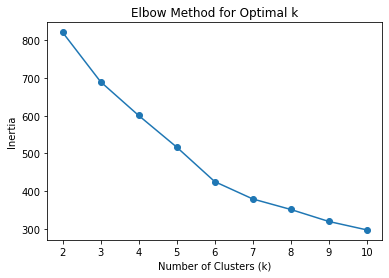

In [1108]:
# check for optimal number of clusters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
k_values = range(2, 11)
inertia_values = []

# Run k-means for each cluster number and store the inertia (within-cluster sum of squares)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    print(k)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [1050]:
data_w_feat[1:428]

,PC1,PC2,PC3,PC4,PC5,Cluster,SimilarityRank
1,2.417391,3.985802,5.497225,3.935845,-0.109483,4,NaN
2,8.207821,-2.110929,4.775588,-4.640456,-0.745283,3,NaN
3,-2.201066,-7.944468,4.121402,-2.766665,-0.735400,3,NaN
4,7.878511,-1.185073,3.241260,-6.387511,-3.507717,3,NaN
5,3.392142,-3.282233,4.339750,-2.112383,1.411412,3,NaN
...,...,...,...,...,...,...,...
424,-0.436800,2.927382,-1.649259,-2.006808,0.668861,0,NaN
425,-1.085362,5.055415,-6.888666,-1.058327,1.073695,0,NaN
426,-1.469329,1.852752,-1.071863,1.773566,0.034033,0,NaN
427,-0.742329,1.561865,-3.250225,-0.465357,-0.004625,0,NaN


In [1142]:
#Apply clustering
#select the features you want to use in the next statement
data_w_feat = final_w_vectors[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]
data_w_feat = data_w_feat.fillna(0)
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(data_w_feat)

# Standardize the features (important for k-means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform k-means clustering (set value of K)
num_clusters = 5

   
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
model = kmeans.fit(scaled_data)
inertia_values.append(kmeans.inertia_)

df['Cluster'] = kmeans.fit_predict(scaled_data)

# Compute similarity rankings based on clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
#print(cluster_centers)# Inverse transform to get cluster centers in original scale
closest_points, _ = pairwise_distances_argmin_min(cluster_centers, scaled_data)
print(cluster_centers)
print(closest_points, _)
print(range(5))
df['SimilarityRank'] = df.index.map(dict(zip(closest_points, range(num_clusters))))

# Display the DataFrame with cluster assignments 
print(df)

[[ 2.05692422  1.15167882 -2.25915396  1.10866645 -0.36574466]
 [-7.64894765 -1.07940586  0.45639806  0.07579337 -0.05384027]
 [ 3.0792671   1.97654572 -1.2744878  -0.21272935  1.35479655]
 [-2.60391075 18.05111677 12.2137275   0.43413823  0.34774032]
 [ 5.24446888 -1.08977609  0.34654755 -0.49705251 -0.48900577]]
[13 57  6 38  4] [ 2.01702427  5.95993531  2.49772136 15.99355732  3.77922299]
range(0, 5)
          PC1        PC2        PC3       PC4       PC5  Cluster  \
0   19.824207   0.095449   1.326442 -0.031282  1.707471        2   
1   11.804373   2.709951   4.520950 -0.444676 -0.592410        4   
2    7.745772   1.784263  -0.072426  0.694478  1.049893        2   
3   10.174170  -2.437843   1.342641 -0.297249 -0.347480        4   
4   11.032831  -2.824743   1.349849 -0.236688 -0.331049        4   
5   11.091712  -0.139421  -2.711197 -0.145671 -0.441696        4   
6   11.525021   0.510456  -2.162913 -0.004377  0.866436        2   
7    7.876668  -0.006257   0.796523  0.265380 -0.

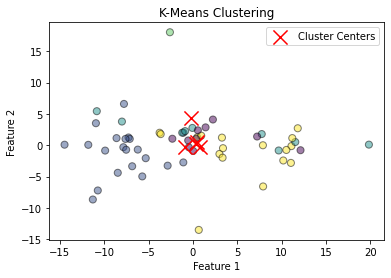

In [1144]:
plt.scatter(df['PC1'], df['PC2'], c=df.Cluster, cmap='viridis', edgecolor='k', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.savefig("Lacerda.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [1072]:
# Apply KNN for the closest neighbors
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
# we should have 3 vectors for 3 centroids.
print(kmeans.cluster_centers_.shape) # (3, 10)

# initialize NearestNeighbor with 5 neighbors and fit our dataset.
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(scaled_data)

# Use the model to query the centroids' neighbors.
distances, indices = knn.kneighbors(kmeans.cluster_centers_)

for centroid, distance_from_centroid, index in zip(kmeans.cluster_centers_, distances, indices):
  #print(centroid, distance_from_centroid, index,"end")
    print(distance_from_centroid)

(5, 5)
[0.07222699 0.08655014 0.08713612 0.09916544 0.10441655]
[0.01258112 0.04298038 0.04627455 0.14242597 0.14888548]
[0.00429715 0.00474935 0.03348915 0.09559243 0.1076812 ]
[0.03953194 0.08717266 0.10840634 0.11031035 0.1208093 ]
[0.01708876 0.02499889 0.0382975  0.04631442 0.06346874]


In [1055]:
#save the closest points in a dictionary
result = {}
for i,j in enumerate(indices.flatten()):
    result[j] = distances.flatten()[i]

In [1056]:
result

{415: 0.01768409404278848,
 327: 0.01852246562686577,
 375: 0.019242200333039805,
 412: 0.02361929891004333,
 424: 0.024541187665796493,
 120: 0.04068247389138824,
 297: 0.04305315006422472,
 44: 0.04588304985859537,
 137: 0.0641001227548107,
 58: 0.07914312912250887,
 37: 0.013215873671671763,
 168: 0.031125935191938292,
 217: 0.04798239709476637,
 18: 0.05781519651483713,
 17: 0.061265088767830767,
 42: 0.004842225196489136,
 64: 0.005265641342171445,
 152: 0.016667421727665,
 252: 0.040509928721885746,
 46: 0.06443977289801961,
 73: 0.013143257218548698,
 86: 0.024274379245298627,
 100: 0.17011378458379256,
 222: 0.18977063560641227,
 34: 0.19077881545356512}

In [1057]:
len(result)

25

(array([8., 6., 4., 4., 0., 0., 0., 0., 1., 2.]),
 array([0.00484223, 0.02343588, 0.04202954, 0.0606232 , 0.07921686,
        0.09781052, 0.11640418, 0.13499784, 0.1535915 , 0.17218516,
        0.19077882]),
 <BarContainer object of 10 artists>)

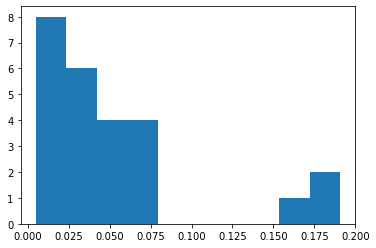

In [1058]:
#print histogram of distances to check threshold
plt.hist(distances.flatten())

In [1059]:
#filter values below the threshold
def remove_greater_than_x(dictionary, x):
    # Use dictionary comprehension to filter out keys with values less than or equal to x
    filtered_dict = {key: value for key, value in dictionary.items() if value <=  x}
    return filtered_dict

# Example dictionary

In [1067]:
result_filtered = remove_greater_than_x(result,0.035)
len(result_filtered)

12

In [1068]:
result_filtered

{415: 0.01768409404278848,
 327: 0.01852246562686577,
 375: 0.019242200333039805,
 412: 0.02361929891004333,
 424: 0.024541187665796493,
 37: 0.013215873671671763,
 168: 0.031125935191938292,
 42: 0.004842225196489136,
 64: 0.005265641342171445,
 152: 0.016667421727665,
 73: 0.013143257218548698,
 86: 0.024274379245298627}

In [1069]:
#final list of relevant papers
final[final.index.isin(result_filtered.keys())].Title.tolist()

['Software fault prediction: A literature review and current trends',
 'Assessing eLearning systems success In Nigeria: An application of the Delone And Mclean information systems success model',
 'The readability of pediatric patient education materials on the world wide web',
 'NATURAL LANGUAGE PROGRAMMING: STYLES, STRATEGIES, AND CONTRASTS.',
 'Readability and Comprehensibility of Patient Education Material in Hand-Related Web Sites',
 'Readability of published dental educational materials',
 'Understanding recurring quality problems and their impact on code sharing in block-based software',
 'NATURAL LANGUAGE PROGRAMMING: STYLES, STRATEGIES, AND CONTRASTS.',
 'Observational studies to accelerate process experience in classroom studies: An evaluation',
 'Patient-reported outcome measures suitable to assessment of patient navigation',
 'The didactic potential of virtual information educational environment as a tool of geography students training',
 'User interface patterns in recomme